# SVM support vector machine

# 분류나 회귀분석에 사용가능한 기법

# 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용


# 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에

# 신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘


# 이미지 인식이나 필체패턴 인식과 같은 작업에 주로 사용

# 마진을 최대로 하는 결정경계를 찾는 것이 SVM의 주된 알고리즘


# 결정경계는 서로 다른 분류값을 결정짓는 경계

# => line, plane(2D), hyperplane(3D)


# 마진은 결정경계와 서포트벡터간의 거리를 의미

# 서포트벡터는 결정경계를 만드는데 영향을 주는 최전방 데이터


# 커널 트릭kernel trick

# 구별이 불가능한 집합은 구별이 가능한 방향으로

# 사상시킨 새로운 공간에서는 구별이 가능할 것임


# 차원을 변환시키는 mapping 함수를 통해

# 기존의 2차원 공간에 새로운 차원을 추가해서

# 3차원으로 변환할 수 있다면

# 선형적으로 구별이 가능해 짐


# 선형적으로 불가능한 차원을

# 선형적으로 구분이 가능한 고차원으로 변환하는 것을

# 커널 트릭이라 하고

# 이때 사용하는 함수를 커널 함수라 함


# 대표적인 커널함수는 카우시안 커널RBF이고

# 이것을 통해 무한대 차원으로 매핑 가능


# 주성분분석 Principal Component Analysis

# 자료의 요약이나 '선형관계식'을 통해

# '차원수'를 감소시켜 데이터해석을 용이하게 하는데 있음

# 서로 상관이 없거나 독립적인 새로운 변수들을

# 이용해서 정보손실을 최소화하도록 함


# 둘 이상의 양적변수등 사이에서

# 분산/공분산 관계를 이용하여

# 변수들의 선형결합으로 나타나는 주성분을 찾고

# 이 중 중요한 n개의 주성분으로 전체변동의 대부분을

# 설명하고자 하는 다변량 분석법


# 예를 들어, 8x8크기의 손글씨 데이터 경우

# 총 64개의 특성으로 구성되어 있는데

# 글씨가 쓰여진 영역만 따로 골라서 분석에 활용한다면

# 64개의 특성이 모두 다 필요한 것은 아님


# 차원축소 방법 - 투영/사영projection

# 먼저, 데이터에 임의의 초평면을 정의한 다음

# 데이터들을 이 평면에 투영함

# 그런 다음, 데이터의 분산이 최대로 보존되는지 확인


# PCA를 이용해 고차원의 데이터를

# 정보손실없이 변환함으로써 시각화가 편리해지고

# 데이터의 크기가 감소함으로써 빠른 학습이 가능해짐


# PCA 분석을 위해 공분산/고유벡터/고유값에

# 대한 개념 필요 - 선형대수

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

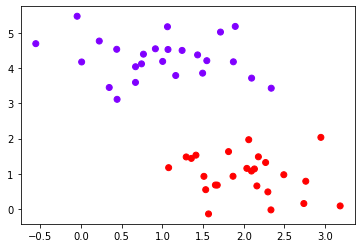

In [4]:
## 선형으로 분류가 가능한 예
# * 점들이 두 집단으로 잘 분류된 예제
X, y = make_blobs(n_samples=50, centers=2,cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

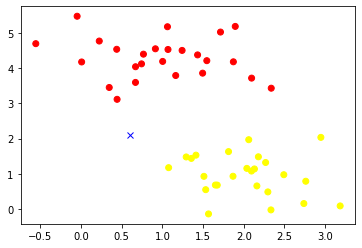

In [5]:
## 잘 찍힌다.  빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할때
 #  * 어느것이 가장 최적으로 분류한 것일까?
    
## 두 개의 데이터 집합을 잘 분리하는 직선을 그려봄
plt.scatter(X[:,0], X[:,1], c = y, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color='blue') # 테스트 점
 

In [6]:
# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)

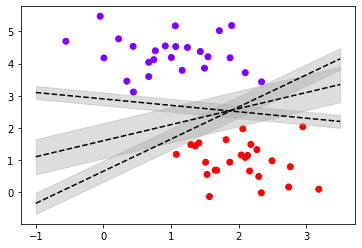

In [7]:
# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
for m,b,d, in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]: 
    yfit= m * xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit-d, yfit+d, color='#AAAAAA', alpha=0.4)    

### 가운데 직선은 다른 두 직선에 비해 비교적 여유(마진)있게 두 집합을 기루고 있음, 이 덕택에 테스트 점 여유있게 분류 가능

### 가운데 직선은 다른 두 직선에 비해 비교적 여유(마진)있게 두 집합을 가르고 있음
### 이 덕택에 테스트 점 역시 여유있게 분류 가능
### 이렇게 최적으로 분류할 수 있는 직선을 통해 나눠지는 영역을 초평면 구하기

In [8]:
from sklearn.svm import SVC

In [9]:
# kernel : 초평면 알고리즘 지정

svc = SVC(kernel='linear')
svc.fit(X, y)

SVC(kernel='linear')

In [10]:
# 초평면/ 서포트벡터 정보 

svc.coef_[0][0], svc.coef_[0][1] # 회귀계수
svc.intercept_[0]       # 절편
svc.support_vectors_    # 서포트벡터

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

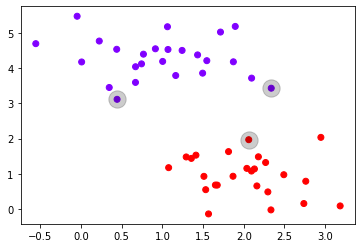

In [11]:
## 결정경계 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k')

## https://url.kr/va41mx

TypeError: plot_decision_regions() missing 2 required positional arguments: 'y' and 'classifier'

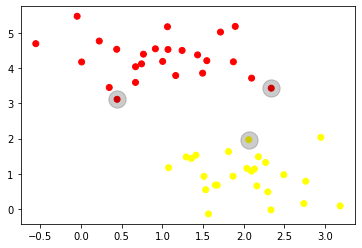

In [12]:
## 결정경계 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k') # 서포트 벡트 표시.

svm_visual.plot_decision_regions(svc)

ax = plt.gca()    # 그래프 축정보 알아내기

xlim = ax.get_xlim()

ylim = ax.get_ylim()


x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)


Y, X = np.meshgrid(y, x)

xy = np.vstack([X.ravel(), Y.ravel()]).T # 전치행렬, v스택 형태로 값을 만들어서



# 얘가 이제 실제 결정영역을 구분짓는 함수
P = svc.decision_function(xy).reshape(X.shape) 


# 초평면을 나누는 결정경계에 몰리는 점들 예측


ax.contour(X, Y, P, colors='k', levels=[-1,0,1],

           alpha=0.5, linestyle=['--','-','--'])

# 결정경계에 몰리는 점들을 시각적으로 표시 : 등고선

np.meshgrid(y, x)[:5]
xy[:5]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

## 서포트 벡터 찍었을때는 회색 점 3개가 나왔죠? 이 점 3개들은 서포트 벡터 실제 두 집단을 구분하는 초평면이라고 보면 된다.

In [ ]:
svc.decision_function(xy)

### 개념을 알아내자. 서포트 벡터를 찾고, 마진을 제대로 잡는 영역을 찾아내서 뚝 잘라내서 판단한다.

## 문제는 성형은 구분이 잘 되는데, 비선형은 구분이 잘 안된다, 이거다.

## 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도 초평면을 구할 수 있을까?

In [21]:
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(n_samples=200, noise=0.04, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

## 커널 트릭
* 구분이 불가능한 집합은
  구분이 가능한 방향으로 사상시킨 새로운 공간에서는 구별이 가능할 것임.
* 차원을 변환시키는 mapping 함수를 통해 (차원을 바꿔주는)
* 기존의 2차원 공간에 새로운 차원을 추가해서 3차원으로 변환할 수 있다면 선형적으로 구분이 가능해짐

* 선형적으로 불가능한 차원을  선형적으로 구분이 가능한 고차원으로 변환하는 것을 커널 트릭이라 하고 
  이때 사용하는 함수를 커널 함수라 함
  
* 대표적인 커널함수는 카우시안 커널 RBF이고 이것을 통해 무한대 차원으로 매핑 가능 

In [23]:
## 2차원 데이터를 3차원으로 변환후 시각화
from mpl_toolkits.mplot3d import Axes3D

C:\Users\TJ\AppData\Local\Temp/ipykernel_10988/4256827588.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


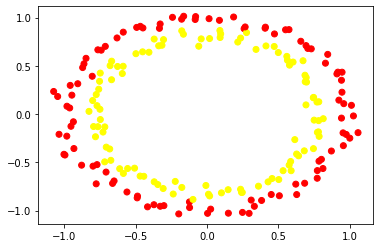

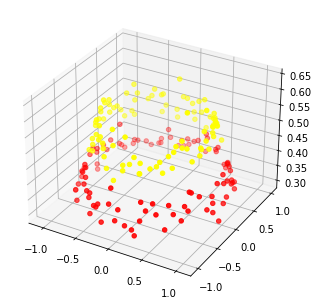

In [24]:
X, y = make_circles(n_samples=200, noise=0.04, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

# 커널함수 : 2차원을 3차원으로 변환  # z좌표는 커널함수를 이용해서 쓰는 겁니다. 지수선언을 해서 z좌표를 뽑아낸다는 겁니다.
z = np.exp(-(X ** 2).sum(1))

# 3차원으로 시각화
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')

In [25]:
import svm_visual

## svm 시각화

http://naver.me/5ODLhkzf

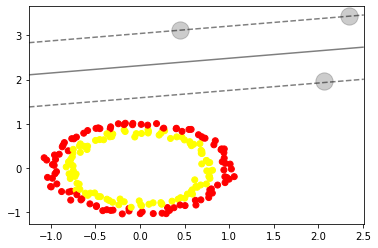

In [26]:
## 결정경계 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k') # 서포트 벡트 표시.

svm_visual.plot_svc_decision_function(svc)

In [17]:
## SVM 규제/감마 매개변수 알아보기
!pip install mglearn

  Using cached mglearn-0.1.9-py2.py3-none-any.whl


In [18]:
import mglearn

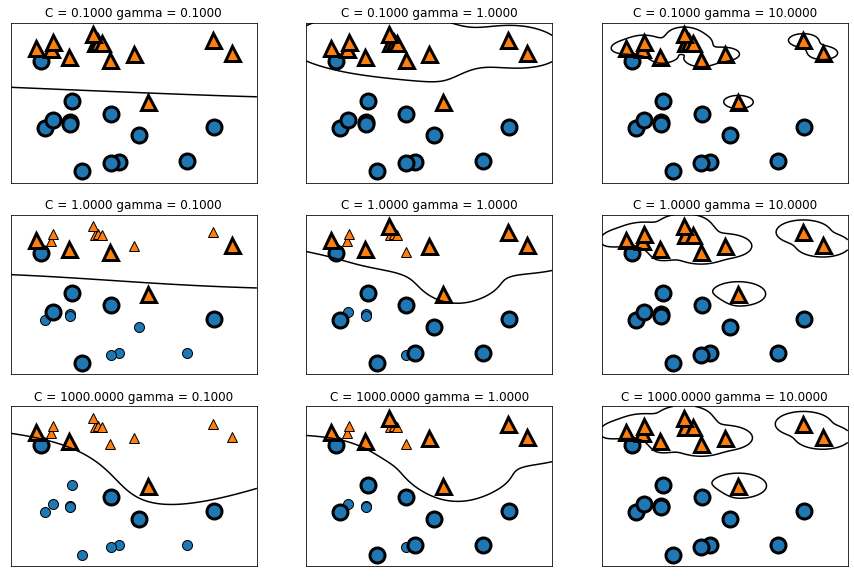

In [20]:
fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,
                              log_gamma=gamma, ax=a)

## Gamma하고 C값에 따라서 결정영역이 어떻게 변하는지 볼 수 있을 것이다.

In [27]:
## iris 데이터를 SVM의 RBG 커널로 분석
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
iris = load_iris()

data = iris.data[:, 0:2]
target = iris.target

Xtrain, Xtest, ytrain, ytest = \
     train_test_split(data, target, test_size=0.3, random_state=2111161115, stratify=target)
    
svc = SVC(kernel='rbf')
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)

svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.819047619047619, 0.8222222222222222)

C:\Users\TJ\Desktop\Jupyer-HJK\svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\TJ\Desktop\Jupyer-HJK\svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


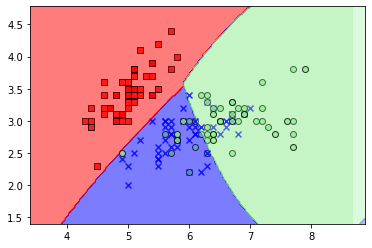

In [31]:
svm_visual.plot_decision_regions(Xtrain, ytrain, svc)

svm_visual.plot_decision_regions(Xtest, ytest, svc)

In [32]:
## 이건 어쩔 수 없이 잘 나눌려고 해도 잘 나눌 수가 없네요.

### fresh.csv 이용해서 달콤함과 아삭함에 따른
### 과일, 채소, 단백질 분류분석을 SVM으로 실시하세요
### e) 당도가 6, 아삭함이 4인 개체는 무엇으로 분류?

In [46]:
fresh = pd.read_csv('fresh.csv', encoding='euc-kr')

In [47]:
fresh.head()

,이름,단맛,아삭거림,범주
0,포도,8,5,과일
1,생선,2,2,단백질
2,당근,6,10,채소
3,오렌지,7,3,과일
4,샐러리,3,8,채소


In [48]:
fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      15 non-null     object
 1   단맛      15 non-null     int64 
 2   아삭거림    15 non-null     int64 
 3   범주      15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


In [49]:
data = fresh.iloc[:, [1,2]]
target = fresh.범주
target = target.map({'과일':0, '단백질':1, '채소':2})

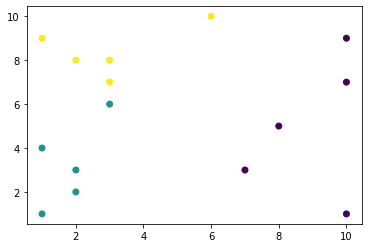

In [50]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=target)

C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\TJ\Desktop\Jupyer-HJK\svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

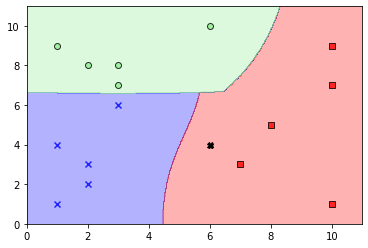

In [53]:
## 요거에 따라서 결정영역을 만들어야 함.

svc = SVC(kernel='rbf', C=10)
svc.fit(data, target)
svc.score(data, target)
# 0.93
svm_visual.plot_decision_regions(
    np.array(data), np.array(target), svc)
plt.plot(6, 4, 'kX')

svc.predict([[6, 4]])

C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\TJ\Desktop\Jupyer-HJK\svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

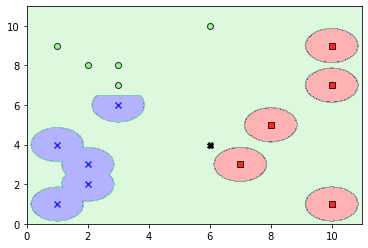

In [55]:
## C값을 10으로 주니까 더 잘 분류가 되죠? array 값이 0으로 뜨죠? 여기다가 감마값을 줘서 0.001로 주면

svc = SVC(kernel='rbf', C=20, gamma=1000)
svc.fit(data, target)
svc.score(data, target)
# 0.93
svm_visual.plot_decision_regions(
    np.array(data), np.array(target), svc)
plt.plot(6, 4, 'kX')

svc.predict([[6, 4]])

C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\TJ\Desktop\Jupyer-HJK\svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\TJ\anaconda3\envs\HJK\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

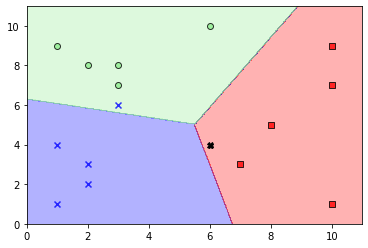

In [56]:
svc = SVC(kernel='rbf', C=20, gamma=0.0001) # 감마값을 크게 줄 수록 반경이 좁아진다.
svc.fit(data, target)
svc.score(data, target)
# 0.93
svm_visual.plot_decision_regions(
    np.array(data), np.array(target), svc)
plt.plot(6, 4, 'kX')

svc.predict([[6, 4]])

## 그라이언트 부스팅,XGBOOST 등이 전처리할 필요없이 잘돌아가니까 매우 좋다고 생각한다.
## 랜덤포레스트, 의사결정 이용해서 분류할 수 있긴 하다.

### 2차원 데이터를 1차원 데이터로 투영시켰을 때, 잘 구분할 수 있는 알고리즘을 찾는게 중요하단 거다.
### 서포트 벡터 머신 같은 경우에는 차원을 증가시키는 거고, 주 성분 분석같은 경우는 고차원 데이터들을 저차원 데이터로 변환하는 기법.
### 주 성분 분석은 반대로 차원을 축소 시켜서 데이터 분석을 용이하게 하는 기법.
### 투영, 프로젝션 개념을 알아야 한다.